**TELECOM CHURN**

**BUSINESS PROBLEM**


The business problem involves predicting customer churn for SyriaTel, a telecom company, to proactively identify which customers are likely to leave the service. This prediction allows Syriatel to implement targeted retention strategies, thereby reducing customer attrition and enhancing profitability. The primary stakeholders in this project include the executive team, who are interested in overall financial performance; the marketing department, which will develop and execute retention campaigns; the customer service team, tasked with addressing customer issues preemptively; and the data analytics team, responsible for developing and maintaining the predictive model. Additionally, customers themselves are indirect stakeholders, as improved retention efforts can lead to better service and satisfaction.

**Problem Questions**

1. Which Customers are at the highest risk of churning in the next month?
2. What are the main factors contributing to customer churn?
3. How much money is lost due to customer churn?
3. How can we segment the customer base to tailor retention strategies effectively?
4. What is the expected churn rate over the next quarter if no interventions are made?

**DATA UNDERSTANDING**

The dataset,sourced from Kaggle, provides comprehensive information on customer behavior and service usage. Key columns include demographic and account details ('state', 'account length', 'area code', 'phone number'), service plans ('international plan', 'voice mail plan'), usage metrics ('number vmail messages', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'), corresponding charges, and interaction frequency ('total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls'). The target variable 'churn' indicates whether a customer has discontinued the service. This dataset offers a rich foundation for understanding patterns and factors influencing customer churn, facilitating the development of a predictive model to address the business problem.

In this section, we will undertake a series of steps to enhance our understanding of the data at hand and to prepare it for modeling purposes. We'll engage in some data cleaning and preliminary analyses to gain insight.

We begin by importing the necessary libraries required to carry out various tasks.

In [1]:
#Import the relevant libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score

Next, we load the dataset, and read it, displaying its contents to examine its structure and contents.

In [2]:
#Load the dataset
with open('archive/bigml_59c28831336c6604c800002a.csv') as f:
    df = pd.read_csv(f)
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


The dataset is structured in a tabular format, comprising rows and columns. Among the visible column names are "state," "account length," "area code," etc., along with their respective elements. Further exploration can reveal additional details, such as the data types of the columns and the total number of columns available.

In [3]:
#display the general information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

We could further explore by examining the initial rows of the dataset, its size, column names, data types, and additional details

In [4]:
#display the first few rows of the dataset to visually inspect the data
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
#display the size of the data
print(df.shape)
print()
#display all the columns of the dataset
print(df.columns)
print()
#display the data types of each column
print(df.dtypes)

(3333, 21)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64

In summary, the dataset contains 3333 rows and 21 columns, capturing various aspects of customer behavior and service usage. The columns include categorical variables such as 'state', 'phone number', 'international plan', and 'voice mail plan', as well as numerical variables like 'account length', 'number vmail messages', and various service usage metrics ('total day minutes', 'total day calls', 'total day charge', etc.). The target variable 'churn' is a boolean indicating whether a customer has left the service. The data types range from integers and floats for numerical values to objects for categorical values, providing a diverse set of features for building a predictive churn model.

Now equipped with a better understanding of both the business problem and the dataset, we can proceed to prepare the data for analysis and modeling. This involves identifying the variables to be utilized and devising strategies to address the business problem questions using the available data.

**DATA PREPARATION**

In this section, we will be readying our data for thorough analysis and modeling. This encompasses tasks such as cleaning the data by addressing missing or duplicated values, ensuring that each column's data types are appropriately formatted for analysis, among other procedures. This phase aims to provide valuable insights into the data and how it can be leveraged to address our problem effectively.

We can begin by creating a duplicate of our dataset to allow us to manipulate the copy while preserving our original dataset in case it is needed later on.

In [6]:
#make a copy of the original data, df
df2 = df.copy()
df2

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


**1. Handling Missing Values**

Our first step in preparing the data for modeling will be to handle missing values.

In [7]:
#check for duplicates and missing values if any
print(df2.duplicated().sum())
print()
print(df2.isnull().sum())

0

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


Phew! Luckily the dataset does not not contain any missing values.

**2. Encoding Categorical Variables**

Next, we convert all the categorical variables to numeric values.

'International plan', 'Voicemail plan' and 'Churn' are binary categorical variables hence we use Label Encoding.

'State" has multiple categories so we use One-Hot Encoding.

We then drop 'phone number' as it is a unique identifier and not useful for modeling.

In [8]:
# Label encoding for binary categorical variables
label_encoder = LabelEncoder()
df2['international plan'] = label_encoder.fit_transform(df2['international plan'])
df2['voice mail plan'] = label_encoder.fit_transform(df2['voice mail plan'])
df2['churn'] = label_encoder.fit_transform(df2['churn'])

# One-hot encoding for the 'state' column
df2 = pd.get_dummies(df2, columns=['state'], drop_first=True)

# Drop the 'phone number' column as it is not useful for modeling
df2.drop('phone number', axis=1, inplace=True)

# Display the first few rows of the processed data
df2.head()


,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#display the general information of the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   int32  
 3   voice mail plan         3333 non-null   int32  
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

Label Encoding converts international plan, voice mail plan, and churn to numeric values where 'yes' becomes 1 and 'no' becomes 0 (or vice versa depending on the data).

One-Hot Encoding creates new columns for each unique value in state, where each column represents a state, and a row entry in that column will be 1 if the state matches the column name, otherwise 0.


Our new dataset still contains 3333 rows but the columns have now increased from 21 to 69 columns. The data types have all been converted to numerical values now, making it more suitable for machine learning algorithms.

**3. Feature Scaling**

We then standardize the numerical features to ensure they have a mean of 0 and a standard deviation of 1.

In [10]:
# List of numerical columns
numerical_columns = ['account length', 'area code', 'number vmail messages', 'total day minutes',
                     'total day calls', 'total day charge', 'total eve minutes', 'total eve calls',
                     'total eve charge', 'total night minutes', 'total night calls', 'total night charge',
                     'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])

# Display the first few rows of the processed data
df2.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.676489,-0.523603,0,1,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,...,0,0,0,0,0,0,0,0,0,0
1,0.149065,-0.523603,0,1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,...,0,0,0,0,0,0,0,0,0,0
2,0.902529,-0.523603,0,0,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,...,0,0,0,0,0,0,0,0,0,0
3,-0.428590,-0.688834,1,0,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,...,0,0,0,0,0,0,0,0,0,0
4,-0.654629,-0.523603,1,0,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,...,0,0,0,0,0,0,0,0,0,0


**4. Feature Engineering**

We then perform feature engineering by creating new features from features that can be combined.

In [11]:
# Creating new features
df2['total calls'] = df2['total day calls'] + df2['total eve calls'] + df2['total night calls'] + df2['total intl calls']
df2['total minutes'] = df2['total day minutes'] + df2['total eve minutes'] + df2['total night minutes'] + df2['total intl minutes']
df2['total charge'] = df2['total day charge'] + df2['total eve charge'] + df2['total night charge'] + df2['total intl charge']

df2['avg day call duration'] = df2['total day minutes'] / df2['total day calls']
df2['avg eve call duration'] = df2['total eve minutes'] / df2['total eve calls']
df2['avg night call duration'] = df2['total night minutes'] / df2['total night calls']

df2['day to eve ratio'] = df2['total day minutes'] / df2['total eve minutes']
df2['day to night ratio'] = df2['total day minutes'] / df2['total night minutes']
df2['intl to total ratio'] = df2['total intl minutes'] / df2['total minutes']

df2['high customer service calls'] = (df2['customer service calls'] > 3).astype(int)

df2['plan_combination'] = df2['international plan'] * 2 + df2['voice mail plan']

# Display the first few rows of the processed data
df2.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total minutes,total charge,avg day call duration,avg eve call duration,avg night call duration,day to eve ratio,day to night ratio,intl to total ratio,high customer service calls,plan_combination
0,0.676489,-0.523603,0,1,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,...,2.277892,2.276948,3.287086,1.262231,-1.861984,-22.189143,1.807648,-0.037319,0,1
1,0.149065,-0.523603,0,1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,...,1.857234,1.858996,-0.296787,-0.746069,7.160988,3.087867,-0.315272,0.667919,0,1
2,0.902529,-0.523603,0,0,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,...,-0.458828,-0.463850,1.728299,-3.170363,-3.804613,-0.742542,-1.543601,-1.532429,0,0
3,-0.428590,-0.688834,1,0,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,...,-1.927846,-1.931715,-1.497404,4.510109,0.138364,-0.800840,-27.963899,0.675897,0,2
4,-0.654629,-0.523603,1,0,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,...,-1.604518,-1.600426,-0.383438,-0.945602,-0.258766,0.231093,0.868910,0.030654,0,2


These new features can help improve the model's ability to predict churn by providing more nuanced information about customer behavior and service usage.

**VISUALIZATIONS**

**1. Distribution of Numerical Features**

We can use seaborn to create histograms to understand the distribution of numerical features.

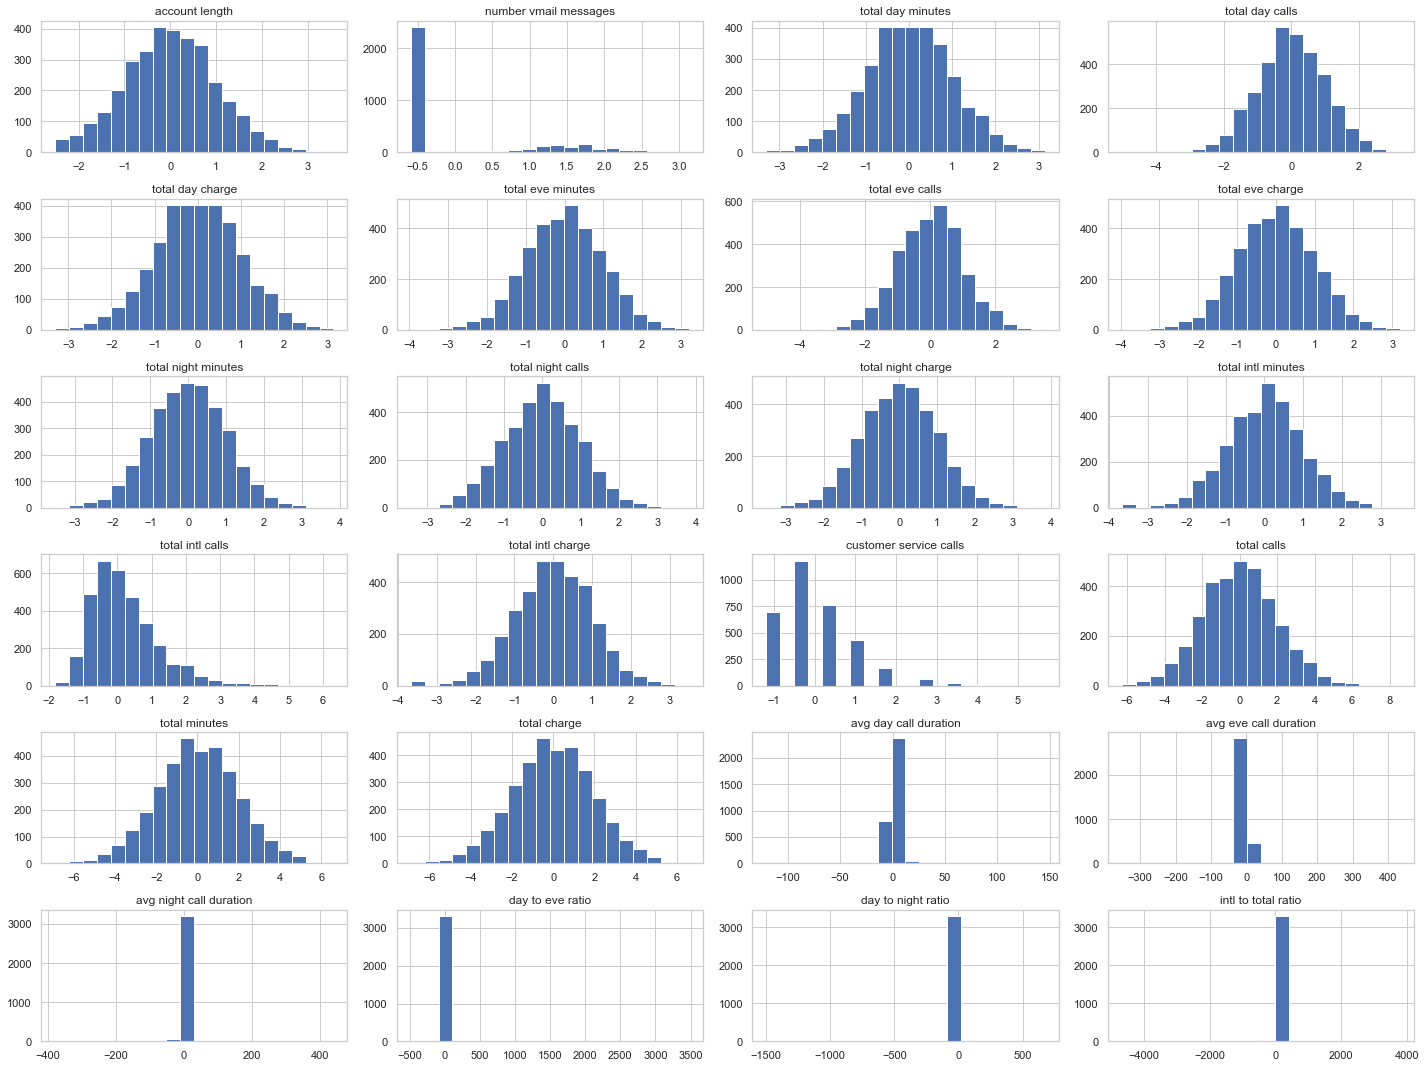

In [12]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a list of numerical columns
numerical_columns = ['account length', 'number vmail messages', 'total day minutes', 'total day calls',
                     'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                     'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
                     'total intl calls', 'total intl charge', 'customer service calls', 'total calls',
                     'total minutes', 'total charge', 'avg day call duration', 'avg eve call duration',
                     'avg night call duration', 'day to eve ratio', 'day to night ratio', 'intl to total ratio']

# Plot histograms for numerical columns
df2[numerical_columns].hist(bins=20, figsize=(20, 15), layout=(6, 4))
plt.tight_layout()
plt.show()

The histograms above provide the frequency distribution of numerical features. The distributions of most of the histograms are normal distributions.

**2. Correlation Heatmap**

A heatmap can help visualize the correlations between different features.

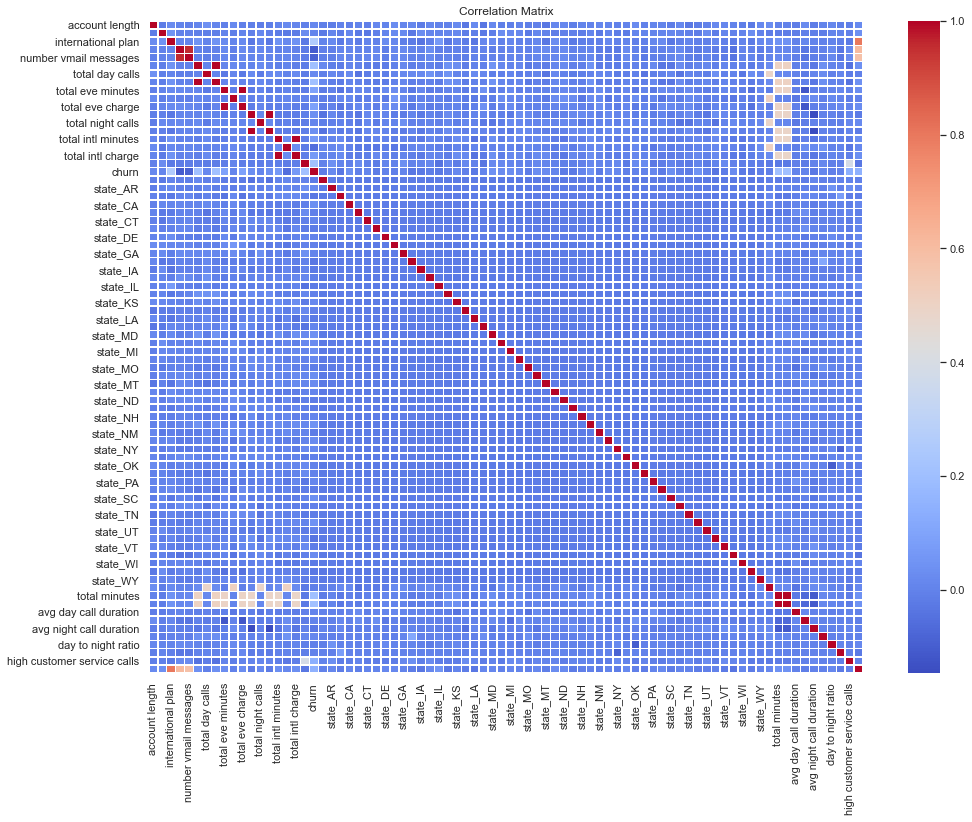

In [13]:
# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The strong red line from the top left to the bottom right represents the correlation of each variable with itself, which is always 1 (perfect correlation).

total day minutes with total day charge, total eve minutes with total eve charge, total night minutes with total night charge, and total intl minutes with total intl charge:
These pairs show very strong positive correlations. This is expected because the charges are typically calculated based on the minutes.

churn does not show a strong correlation with most other variables in this matrix. This suggests that churn might be influenced by a complex combination of factors rather than a single variable.
State Variables:

Lack of strong correlations with churn indicates the need for complex modeling techniques to capture the relationship between predictors and the target variable.


**3. Pairplot**

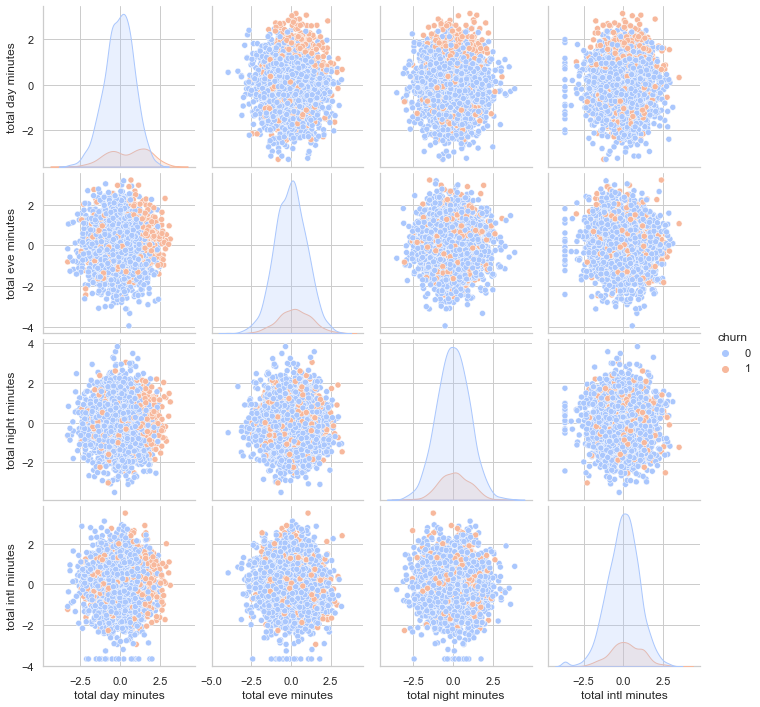

In [14]:
# Select a subset of features for pairplot
pairplot_columns = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'churn']
sns.pairplot(df2[pairplot_columns], hue='churn', palette='coolwarm')
plt.show()

There is significant overlap between churn and non-churn customers across all pairwise feature comparisons. This indicates that the individual features and their pairwise relationships might not be strong predictors of churn.

The distributions of these features for churn and non-churn customers are very similar. This suggests that the churn behavior might not be directly influenced by the total minutes spent on calls (day, eve, night, international).

With our key takeaways from the visualizations, the cleaned data, and a comprehensive understanding of our dataset, we are ready to proceed with modeling to predict customer churn. We begin by splitting our data, ensuring that we can evaluate the model's performance on unseen data and avoid overfitting.

**SPLITTING THE DATA**

In [15]:
# Separate features and target variable
X = df2.drop('churn', axis=1)
y = df2['churn']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
# Verify the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

print("Distribution in Training set:")
print(y_train.value_counts(normalize=True))
print("Distribution in Testing set:")
print(y_test.value_counts(normalize=True))

Training set size: 2666 samples
Testing set size: 667 samples
Distribution in Training set:
0    0.855214
1    0.144786
Name: churn, dtype: float64
Distribution in Testing set:
0    0.854573
1    0.145427
Name: churn, dtype: float64


**MODEL SELECTION, TRAINING AND EVALUATION**

**Baseline Model**

In [18]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8696
Confusion Matrix:
[[552  18]
 [ 69  28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       570
           1       0.61      0.29      0.39        97

    accuracy                           0.87       667
   macro avg       0.75      0.63      0.66       667
weighted avg       0.85      0.87      0.85       667

ROC AUC Score: 0.8127


C:\Users\Margaret Njenga\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The model correctly classifies approximately 87% of the samples. While this seems good, it doesn't provide the full picture, especially with imbalanced data.

True Negatives (TN): 552 (correctly predicted non-churn)
False Positives (FP): 18 (incorrectly predicted churn)
False Negatives (FN): 69 (incorrectly predicted non-churn)
True Positives (TP): 28 (correctly predicted churn)

The model struggles more with predicting churn (class 1) correctly.

Precision for class 1 (churn): 0.61 – Of the predicted churns, 61% are actual churns.
Recall for class 1 (churn): 0.29 – The model only identifies 29% of actual churns.
F1-Score for class 1 (churn): 0.39 – Harmonic mean of precision and recall, indicating poor performance in identifying churns.

The ROC AUC score of 0.8127 indicates a decent ability of the model to distinguish between churn and non-churn classes.

The warning suggests that the optimization algorithm did not converge. We can try and increase the max_iter parameter to solve this.

In [20]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model with increased max_iter and class_weight
log_reg = LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced')

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.7541
Confusion Matrix:
[[434 136]
 [ 28  69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       570
           1       0.34      0.71      0.46        97

    accuracy                           0.75       667
   macro avg       0.64      0.74      0.65       667
weighted avg       0.85      0.75      0.79       667

ROC AUC Score: 0.8020


The model correctly classifies about 75.41% of the samples.

True Negatives (TN): 552 (correctly predicted non-churn)
False Positives (FP): 18 (incorrectly predicted churn)
False Negatives (FN): 69 (incorrectly predicted non-churn)
True Positives (TP): 28 (correctly predicted churn)

The model now identifies more churns correctly compared to the initial model, as seen by the increase in True Positives.

0.34 – Of the predicted churns, 34% are actual churns.
Recall for class 1 (churn): 0.71 – The model identifies 71% of actual churns, a significant improvement from before.
F1-Score for class 1 (churn): 0.46 – The harmonic mean of precision and recall, indicating better performance in identifying churns compared to the initial model.

The ROC AUC score of 0.8020 indicates a good ability of the model to distinguish between churn and non-churn classes, similar to before.

In [21]:
# Hyperparameter tuning for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced'), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test_scaled)
y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob)}")

# Cross-validation
scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validated ROC AUC scores: {scores}")
print(f"Mean ROC AUC score: {scores.mean()}")

# Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Random Forest Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred_rf)}")
print(f"Random Forest ROC AUC Score: {roc_auc_score(y_test, y_pred_prob_rf)}")

# SMOTE + Logistic Regression
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
log_reg_smote = LogisticRegression(random_state=42, max_iter=2000)
log_reg_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = log_reg_smote.predict(X_test_scaled)
y_pred_prob_smote = log_reg_smote.predict_proba(X_test_scaled)[:, 1]

print(f"SMOTE + Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_smote)}")
print(f"SMOTE + Logistic Regression Confusion Matrix:\n{confusion_matrix(y_test, y_pred_smote)}")
print(f"SMOTE + Logistic Regression Classification Report:\n{classification_report(y_test, y_pred_smote)}")
print(f"SMOTE + Logistic Regression ROC AUC Score: {roc_auc_score(y_test, y_pred_prob_smote)}")

Accuracy: 0.7316341829085458
Confusion Matrix:
[[417 153]
 [ 26  71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       570
           1       0.32      0.73      0.44        97

    accuracy                           0.73       667
   macro avg       0.63      0.73      0.63       667
weighted avg       0.85      0.73      0.77       667

ROC AUC Score: 0.809839030566106
Cross-validated ROC AUC scores: [0.73897886 0.82527341 0.8458077  0.83039986 0.77332536]
Mean ROC AUC score: 0.802757038283354
Random Forest Accuracy: 0.9205397301349325
Random Forest Confusion Matrix:
[[565   5]
 [ 48  49]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       570
           1       0.91      0.51      0.65        97

    accuracy                           0.92       667
   macro avg       0.91      0.75      0.80       667
weighted avg 

Baseline Logistic Regression Model:

Accuracy: 0.7316
Confusion Matrix: Shows that the model correctly predicted 417 out of 570 non-churn instances and 71 out of 97 churn instances.
Classification Report: Precision, recall, and F1-score for the churn class (1) are lower compared to the non-churn class (0), indicating an imbalance in prediction performance.
ROC AUC Score: 0.8098, indicating a decent discriminatory ability.

Random Forest Model:

Accuracy: 0.9205
Confusion Matrix: Shows that the model correctly predicted 565 out of 570 non-churn instances and 49 out of 97 churn instances.
Classification Report: Higher precision and recall for both classes, particularly for the non-churn class (0).
ROC AUC Score: 0.8960, showing better performance compared to the logistic regression model.

SMOTE + Logistic Regression Model:

Accuracy: 0.7556
Confusion Matrix: Shows that the model correctly predicted 439 out of 570 non-churn instances and 65 out of 97 churn instances.
Classification Report: Improved recall for the churn class (1) due to SMOTE balancing, but lower precision.
ROC AUC Score: 0.7895, slightly lower compared to the baseline logistic regression model.

Based on the analysis, Random Forest shows the best performance. However, it's beneficial to further optimize the logistic regression model using the best parameters found from GridSearchCV, along with oversampling techniques and cross-validation.

In [22]:
# Hyperparameter tuning for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced'), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test_scaled)
y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression with Hyperparameter Tuning")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob)}")

# Cross-validation
scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validated ROC AUC scores: {scores}")
print(f"Mean ROC AUC score: {scores.mean()}")

# Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print("Random Forest")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Random Forest Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred_rf)}")
print(f"Random Forest ROC AUC Score: {roc_auc_score(y_test, y_pred_prob_rf)}")

# SMOTE + Logistic Regression
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
log_reg_smote = LogisticRegression(random_state=42, max_iter=2000)
log_reg_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = log_reg_smote.predict(X_test_scaled)
y_pred_prob_smote = log_reg_smote.predict_proba(X_test_scaled)[:, 1]

print("SMOTE + Logistic Regression")
print(f"SMOTE + Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_smote)}")
print(f"SMOTE + Logistic Regression Confusion Matrix:\n{confusion_matrix(y_test, y_pred_smote)}")
print(f"SMOTE + Logistic Regression Classification Report:\n{classification_report(y_test, y_pred_smote)}")
print(f"SMOTE + Logistic Regression ROC AUC Score: {roc_auc_score(y_test, y_pred_prob_smote)}")

Logistic Regression with Hyperparameter Tuning
Accuracy: 0.7316341829085458
Confusion Matrix:
[[417 153]
 [ 26  71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       570
           1       0.32      0.73      0.44        97

    accuracy                           0.73       667
   macro avg       0.63      0.73      0.63       667
weighted avg       0.85      0.73      0.77       667

ROC AUC Score: 0.809839030566106
Cross-validated ROC AUC scores: [0.73897886 0.82527341 0.8458077  0.83039986 0.77332536]
Mean ROC AUC score: 0.802757038283354
Random Forest
Random Forest Accuracy: 0.9205397301349325
Random Forest Confusion Matrix:
[[565   5]
 [ 48  49]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       570
           1       0.91      0.51      0.65        97

    accuracy                           0.92       667
   mac

Despite tuning the hyperparameters, the performance remains suboptimal, with an accuracy of 73.16%.
The precision for class 1 (churn) is only 32%, indicating a high false positive rate.
Recall for class 1 is 73%, indicating the model's ability to capture true positives.

Random Forest:

Random Forest outperforms logistic regression with an accuracy of 92.05%.
It achieves better precision and recall for both classes, especially for churn (class 1).
The ROC AUC score is high, indicating good model performance.

SMOTE + Logistic Regression:

While SMOTE improves the recall for churn instances (class 1), precision drops.
The overall accuracy is slightly higher than the baseline logistic regression but lower than Random Forest.

**RECOMMENDATIONS AND FINDINGS**

Random Forest outperforms Logistic Regression in predicting customer churn, achieving higher accuracy, precision, and recall.

The imbalance between precision and recall in Logistic Regression models suggests that while they are good at identifying some customers likely to churn, they also misclassify a significant portion of non-churners.

Random Forest, with its ensemble approach, provides a more balanced trade-off between precision and recall, making it more suitable for predicting customer churn.

The cost of false negatives (customers who churn but are not identified) can be substantial for a telecommunications company, leading to revenue loss and decreased customer satisfaction.

Stakeholders should prioritize deploying Random Forest models or similar ensemble techniques for churn prediction, focusing on improving recall for class 1 while maintaining high precision.

**Executive Team**

Focus on Financial Performance: Utilize the churn prediction model to estimate potential revenue loss due to customer churn. Prioritize investments in retention strategies that have the highest potential ROI.

Strategic Planning: Incorporate churn predictions into the company’s strategic planning processes to allocate resources effectively and anticipate future challenges.